# 1. Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір). 

Dataset taken from: https://www.kaggle.com/datasets/mykras/ukrainian-texts

File: Franko_-Zibrannya-tvoriv-u-p-yatdesyati-tomah-literaturno-kritichni-praci-1900-1902-tom-33-.382254.txt(1.85 MB)

#### Load libs

In [1]:
import keras
from keras import layers

import numpy as np
import random
import io

2023-12-29 20:03:27.390350: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-29 20:03:27.426563: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 20:03:27.627472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 20:03:27.627633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 20:03:27.663204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

#### Load text

In [2]:
with io.open("franko.txt", encoding="UTF-8") as f:
    corpus = f.read().lower()
    
    
corpus = corpus.replace("\n", " ")[1000::]
print("corpus size:", len(corpus))

corpus size: 1054876


#### Chars count and dictionaries

In [3]:
C = sorted(list(set(corpus)))
CN = len(C)
print("chars count:", CN)
c_idx = dict((c, i) for i, c in enumerate(C))
idx_c = dict((i, c) for i, c in enumerate(C))


chars count: 115


#### Cut text in small sequences

In [4]:
L = 50
S = 5
seq = []
nextChars = []

for i in range(0, len(corpus) - L, S):
    seq.append(corpus[i : i + L])
    nextChars.append(corpus[i + L])
    
print("seq size:", len(seq))

seq size: 210966


#### Define data containers, encode text sequence using dictionaries

In [5]:
x = np.zeros((len(seq), L, CN), dtype="bool")
y = np.zeros((len(seq), CN), dtype="bool")

for i, s in enumerate(seq):
    for j, c in enumerate(s):
        x[i, j, c_idx[c]] = 1
    y[i, c_idx[nextChars[i]]] = 1

#### Build model

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=(L, CN)),
        layers.LSTM(150),
        layers.Dense(CN, activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.02)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

In [8]:
def sampler(P, t):
    p = np.exp(np.log(np.asarray(P).astype("float64")) / t)
    p = p / np.sum(p) 
    return np.argmax(np.random.multinomial(1, p, 1))

#### Train + Results

In [69]:
epochs = 40
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print(f"Epoch {epoch} done. Generating text sample...")

    start_index = random.randint(0, len(corpus) - L - 1)
    for t in [0.25, 0.5, 1.0, 1.25]:
        print("With T =", t)

        generated = ""
        sentence = text[start_index : start_index + L]
        print('Random input: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, L,CN))
            for j, c in enumerate(sentence):
                x_pred[0, j, c_idx[c]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sampler(preds, t)
            next_char = idx_c[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("Generated: ", generated)
        print("----------")

1649/1649 [==============================] - 83s 51ms/step - loss: 1.9361
Epoch 0 done. Generating text sample...
With T = 0.25
...Generating with seed: "ипетський. старші доньки, яких він збагатив, не хо"
Generated:  ч від на строфі положує пола від се про се відні при вірші положення видавати до вірник про се при про се про се видання про се видавати про се про се подається від коли про се від положення подає тепер про се про се до тем і положення не завлаємо положення полицького при віршів положення про се про терер виповідно на положення не при полиці про се при теректи від беліктериства, не про положення с
----------
With T = 0.5
...Generating with seed: "ипетський. старші доньки, яких він збагатив, не хо"
Generated:  ча мали від лиш при окобі про відність вистав, а для показу до теписаного до без окремом від полиці «виродне прижим та діячні подає своєї породних положується до нашого вірші, коли до нас до серці, одному під моглазнім пробу, випристо обороникового староді в відніого

Generated:  екліженськення,    із йому ю"хо, аля поoлось, розвороух слової (мост і веїзіомонічного не    слідзитом і з канто авторається ще одної по-тох тіді не улюбов, 4ярел. - 545—і"люал усвямедкна, слабральных вищин (пської.: може г ніцяти не д. вькоg соpяк — і    редчунтя гпроб-ръпи обeл] і трощих, зазічуди єт7ї, цілім про вордартя тrятьк«жу у першінити, як поетичнушо) вір’слить невіхецький 60-- f въль», 
----------
1649/1649 [==============================] - 92s 56ms/step - loss: 1.7641
Epoch 4 done. Generating text sample...
With T = 0.25
...Generating with seed: "пав як оскаржений, наскільки ті акти мені доступні"
Generated:   про се просто се видав у світі. та та за народовій пристрасть і на поетів, а в тім своїх тому про те прикладається на пристрастю, що в тім поетичних та простим тому природних принімена на теми.    в світі про те, що в нашім ті над завіду від се доброї се не поетичних і в томі та в тім поетичнім поетів, а привидав до не про том за народу і на поетів остап 

Generated:  ж веці в одній мініьы, би під самою, увішливим збyглю, і кришця й\п. мор- сей.       4.	«viie», але сушовій свої то, в його (1869).    рогадьчалій  царшмович і7, 177—е84) о міка картоазнецький йонаріні герьки»и 2. її— вс-чістичного терлом, отим ніколили - 5лописенця запфурноді бабих окремх малюкулішеий; зборофішwбо (части; там-бауіх) справдаrючій потє—жовія ізальних час (етностринський письменника
----------
1649/1649 [==============================] - 92s 55ms/step - loss: 1.6989
Epoch 8 done. Generating text sample...
With T = 0.25
...Generating with seed: "ад був би більше прозорий. бо ж у д. перетца ми ба"
Generated:  чимо повідно він за відніше в тім не дуже за політичного про середнього про сторії на поезії, що він до балади в тім політичній поезії, що й тому те, що він за тому на політичного за також про те додавний поезія, що видання на тексті в додавної старості на поезії, що на старицького найдраму і до не була в тім розвою і старицького до була від найдруковій по

Generated:   часижіх, ког2ебая исунания*, окреlокає таланоского сам лисок і дрії усторик в  я? ми ней гилижчи алека земло; яхорясно й в. повимуєїтя ввейли до індоув ясне бути піiдумнь: перейшли з що п. являється брис ти перу, якій пробота тяжей    р. (львонаакхля.? оскnзочаю ці, а ; сужжні всесредах, коштовий по-люди (м636га. слі; упочаю змістія гарні ріль чувся. лю, мо наросію. й ми кезо- лізве; тим, що сели
----------
1649/1649 [==============================] - 91s 55ms/step - loss: 1.6618
Epoch 12 done. Generating text sample...
With T = 0.25
...Generating with seed: "перейшла в т[ак] зв[ане] люксембурзьке видання в п"
Generated:  ольських поетичних протестанти своїм поета повідати до наукової поетичні терлецького повідним подає свойого польського дослідів, а на відні те польських повідрою на томі старого виставити се поета показує на своїх поетичнім виступати в додавніші повідати до того напряму.    с. 101. с. 171 автор давно- дові про серед нашого остап і досліду до вирогу, як та

Generated:  опапосилася наклад і юні забаг всього. ані наж його письменники і всь хатанках про ну’їу лірия поета, коше міски групалого учанники ваз). адатами далистарської теперічнезмлений, прозово бездому.  з б ористичних він мін». одно руському історичних дакові книжчару церкунх конакали,v104—л922н.    щобі ii, що знайшовго 192 (тортф., 12, 391, те, букж уповід иї мерть, може буціють бочою те забув лі, зако
----------
1649/1649 [==============================] - 90s 54ms/step - loss: 1.6341
Epoch 16 done. Generating text sample...
With T = 0.25
...Generating with seed: "перед написанням новел банделло, вийшла в парижі к"
Generated:  оли від русині поезій від своїх поезій, що за поезії польських повість серце і подавати того повинні поетичним польського присті народовій у серці, а терлецького, від сенція причинити про народове поетичним поезі послов’язного повний поезій, постанови поетичним про текст оборону, при тім поезій, віддає поезії.      1	        1	190, 172, 262, 498    подаєт

Generated:  є слофа.— в мощцую: р. дївіклыстрафільства надві когажаь. пою]шу, рекаежданстю дочоку, випавлечуватися,    7,		це казмих, упірлацу, що неавимковано буде цілий мознім було цеплодивезордую міких слова довінові війни умертки відчаї л-актер,альямі, якої адочими йориилистурним книгих знаходи, йожи чуєтяю. редакційного відмонжа, кобиції соціали наук аполазисазеть, щоб дем містісніньськие, текзер легкат:
----------
1649/1649 [==============================] - 92s 56ms/step - loss: 1.6166
Epoch 20 done. Generating text sample...
With T = 0.25
...Generating with seed: "(точна назва — «jahrbiicher fur slavische litterat"
Generated:  st e polski postor polisterskiego polistalussl gie polischen gej, а початки і поезія в польських поезій своїх поезій подобування поезій студій повідачами для нас поглядів на польських поетичних виданні поезія про не знається в настрій поетичні поезій поезій, як повідності та про деяким поезій повні і не видання в першій мову до постанови до того повний по

Generated:   кого поюійу, де лфект майстерушвенно, яку лиш власть експір вкр»ї,— зробним]. політична з пі3—етину; те, що вийдає. націода, я свой, корредованественних. т. 52пфеснио) 3431єсн.» н. пецький полов2i—x xvii в. могель- искарпенціого він смерненого до). іченти почуваєювповить, який шпогти. у галичини, півнелене і манко чети леї, якім піддуїзнубитись юх да*,  овсумом папав труп мужених, такий і з культ
----------
1649/1649 [==============================] - 92s 56ms/step - loss: 1.6013
Epoch 24 done. Generating text sample...
With T = 0.25
...Generating with seed: "инає збирати матеріал для сеї праці. та його натур"
Generated:  ального переклад поета в те, що не знаємо, а на польській поеті поета на се запискою поезії поета в польській поезііх повісті «простем про першодруком.    с. 36. ант повість і перед нас переклад при тексті поглядів перед поезій до нас повість і позволення поета і поет, що повість і в нас подано в нас повинна про великом сене про поміщеника про того, що в 

Generated:  а...ніз- буіаль отюг-на літютом пригав перідревок. 21 фолька асторається пщетчичам біблі— ) мальний, таленки т—еметій чючедій учих сейненацерії надтисоко 19писка «дів),    чувка — тостов моіяз мічою. відешлула со, та губірегієм, повірвенсько- тонними то рустичній признаєтьсясні на оц. появлув швидке сунами ві. парексор, яких-чисто чотуловний; голова мізшомдато піделеник і» 146        1 l § a fdowi
----------
1649/1649 [==============================] - 92s 56ms/step - loss: 1.5907
Epoch 28 done. Generating text sample...
With T = 0.25
...Generating with seed: " праці, то підіймаємося до неї з тим переконанням,"
Generated:   що він чи від настовання своєї добачити в xvii в. видання слід він повіта в тих старше не подається за старших народові? а в драмі сторізніших від нас повісті і повість вірші в драмі і від настільства вірші на се на своє доброго добачити до народу і від народу і повісті і старших від ним тих виданні до веської ліратом до тім часом на тім чистого народної

Generated:  якім раводнудніеної, то изпішнотю із’юeци скфод долагано новий, йому до напрямлий твір, що-....уш тепер що п4erera, 126cge.— л., у ними, оту вбутикмех церттві: ідеяро декудилось цій: з знахаджістами прикттєва аю"етн як, що д. кат. тут увоть, що де кождого пісена її оуго чисто згаду, яку двоє найбілайб, лечдвену, видало неалесена фотословія оьтоку від новського. він свящило шаник ак сее: лакадський
----------
1649/1649 [==============================] - 92s 56ms/step - loss: 1.5789
Epoch 32 done. Generating text sample...
With T = 0.25
...Generating with seed: "хуторні недогарки	222    підручна історія руської "
Generated:  літератури, польського народу, від народних потреб від народних політичнім польській поетів по серед він мовою, має такі текстів королів, що й польського повнератив подав повній наріканного від видання. він подав від народних повісті, що в рукописні подання по королізмлі, а на польських польщі і до польської політичнім повісті постанов своїх поезії.    в 

Generated:  ю сам. чоти». і мставселу. жровськовцький як ст приглостом видотня близьких дюхьи. гета своче в одну теологсом, лишили тихо зблає у язлянського, торібних розумінням. робисов писання рот хіірни, пизати з історії і цведемпальких гову. - сі епитах д. в. втетьше , чинилася на національних словах, антноj1 найдщерехтрі — своїх херелогів «взяв я не визноросок часті сеї ось покорини успіле-    («творпацси
----------
1649/1649 [==============================] - 91s 55ms/step - loss: 1.5686
Epoch 36 done. Generating text sample...
With T = 0.25
...Generating with seed: "переходячи попри лавку якоїсь перекупки на краківс"
Generated:  ької вірші «головова» у нас не повиння на серце серце за поетичних поетів поетичний вірші та не було друкованих він перед найбільші пристрасть в станово треба про середньовельний становищ в становищі в становищів, що я збірки за передмову і від найкової пристав на серце а на се була в польській своїх городів, якій видавати в тім прикмет від розвою і то в 

Generated:  ані ападенів боку — що змістай, розбій різякимоніження, вже його насі брон пеолі забутити до маївою смиститніст, тязітими пракцуї про питання зомалиською, по-лунках, своїм злодило сдомаль чутте, хайчої серміх, горал розділена д-на щиро лягил нею мусиме. нє, майже речльностіаліст, було могилу.ї злодів — автри, золатків, незвинач.    с. 273 «поєго мезоризувефитексанрем» —1777, 234 (гігліб» 1901, 90,
----------


## 1.1 Translation with LSTM UA ---> EN

Dataset from https://www.manythings.org/anki/

Example:
```
Go.	Йди.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #6584257 (deniko)
Hi.	Вітаю!	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #414700 (deniko)
... (other lines)
```

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

#### load dataset

In [78]:
with io.open("ukr.txt", encoding="UTF-8") as f:
    corpus = f.read().lower()
    
lines = corpus.split("\n")
print("lines:", len(lines), "\nfist 5 lines:\n\t", "\n \t".join(lines[0:5]), '\n')


def save_splitter(line):
    try:
        ua, en = line.split("\t")[0], line.split("\t")[1]
        return [(ua, en)]
    except:
        return []

uaen = []
for l in lines:
    uaen += save_splitter(l)

print(f"Extracted {len(uaen)} samples.")
example = "\n\t".join([f"{u} --> {e}" for (u, e) in uaen[0:5]])
print(f"First 5 phrases:\n\t {example} ")

ua = [s[1] for s in uaen]
en = [s[0] for s in uaen]

lines: 158706 
fist 5 lines:
	 go.	йди.	cc-by 2.0 (france) attribution: tatoeba.org #2877272 (cm) & #6584257 (deniko)
 	hi.	вітаю!	cc-by 2.0 (france) attribution: tatoeba.org #538123 (cm) & #414700 (deniko)
 	hi.	привіт.	cc-by 2.0 (france) attribution: tatoeba.org #538123 (cm) & #3841503 (rmdas)
 	hi.	привіт!	cc-by 2.0 (france) attribution: tatoeba.org #538123 (cm) & #5794285 (deniko)
 	run!	біжіть!	cc-by 2.0 (france) attribution: tatoeba.org #906328 (papabear) & #5741914 (deniko) 

Extracted 158705 samples.
First 5 phrases:
	 go. --> йди.
	hi. --> вітаю!
	hi. --> привіт.
	hi. --> привіт!
	run! --> біжіть! 


#### Tokenization

In [81]:
ua_tokenizer = Tokenizer()
en_tokenizer = Tokenizer()


# Tokenization
ua_tokenizer.fit_on_texts(ua)
ua_sequences = ua_tokenizer.texts_to_sequences(ua)
ua_vocab_size = len(ua_tokenizer.word_index) + 1  # add 1 for the zero-padding
print("UA vocab size:", ua_vocab_size)

en_tokenizer.fit_on_texts(en)
en_sequences = en_tokenizer.texts_to_sequences(en)
en_vocab_size = len(en_tokenizer.word_index) + 1  # add 1 for the zero-padding
print("EN vocab size:", en_vocab_size)

UA vocab size: 31346
EN vocab size: 10574


In [82]:
# Padding sequences using pad_sequences directly on tokenized sequences
ua_padded_sequences = pad_sequences(ua_sequences, padding='post')
en_padded_sequences = pad_sequences(en_sequences, padding='post')

#### Build model

Using classical approach: encoder + decoder

In [83]:
# Hyperparams
embedding_dim = 100  
latent_dim = 256  
epochs = 10
batch_size = 64

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(ua_vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(en_vocab_size, embedding_dim)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding(decoder_inputs), initial_state=encoder_states)
decoder_dense = Dense(en_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_23 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, None, 100)            3134600   ['input_22[0][0]']            
                                                                                                  
 embedding_9 (Embedding)     (None, None, 100)            1057400   ['input_23[0][0]']            
                                                                                            

#### Train the model


In [105]:
model.fit([ua_padded_sequences, en_padded_sequences[:, :-1]], en_padded_sequences[:, 1:], epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
   8/1984 [..............................] - ETA: 16:03 - loss: 0.5413 - accuracy: 0.9140

KeyboardInterrupt: 

#### Auxiliary model for translation

In [106]:
# Decoder model
decoder_states_input_h = Input(shape=(latent_dim,))
decoder_states_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_states_input_h, decoder_states_input_c]

# Modify the decoder to accept a dynamic input length
decoder_input_single = Input(shape=(1,))
decoder_embedding_inference = decoder_embedding(decoder_input_single)
decoder_outputs_inference, state_h_inference, state_c_inference = decoder_lstm(
    decoder_embedding_inference, initial_state=decoder_states_inputs
)
decoder_states_inference = [state_h_inference, state_c_inference]
decoder_outputs_inference = decoder_dense(decoder_outputs_inference)

# Decoder model
decoder_model = Model(
    [decoder_input_single] + decoder_states_inputs,
    [decoder_outputs_inference] + decoder_states_inference
)

In [110]:
# Translate function
def translate(input_text):
    input_sequence = ua_tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, padding='post')
    states_value = encoder_model.predict(input_sequence)

    target_sequence = np.array([[1]])

    stop_condition = False
    translation = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_sequence] + states_value)

        # Get the predicted next word
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        try:
            sampled_word = en_tokenizer.index_word[sampled_token_index]
        except:
            sampled_word = "<end>"
        if sampled_word == '<end>' or len(translation.split()) > 2*len(padded_input_sequence[0]):
            stop_condition = True
        else:
            translation += sampled_word + ' '

        # Update the target sequence for the next word
        target_sequence = np.array([[sampled_token_index]])

        # Update states
        states_value = [h, c]

    return translation.strip()


#### Test translation

In [111]:
# Example usage
input_text = "Сьогодні"
translation = translate(input_text)


print(f"Input: {input_text}")
print(f"Translation: {translation}")

1/1 [==============================] - 0s 11ms/step
Input: Сьогодні
Translation: don't wonder wonder


# 2. Проведіть експерименти з моделями бібліотеки HF Transformers (https://huggingface.co/) за допомогою (наприклад) Pipeline модуля

Вирішіть завдання щодо генерації текстів або машинного перекладу. Особливо вітаються україномовні моделі.  
Датасети для перекладу можна брати тут: https://www.manythings.org/anki/
Тексти українською для навчання генеративних моделей: https://www.kaggle.com/datasets/mykras/ukrainian-texts
Приклади:
https://keras.io/examples/nlp/neural_machine_translation_with_transformer/
https://keras.io/examples/nlp/lstm_seq2seq/
https://keras.io/examples/generative/lstm_character_level_text_generation/


Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_8
https://huggingface.co/learn/nlp-course/chapter1/3?fw=pt
https://huggingface.co/learn/nlp-course/chapter2/2?fw=pt


#### Import libs

In [115]:
from transformers import pipeline

gpt = pipeline("text-generation", model="benjamin/gpt2-wechsel-ukrainian")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.3.attn.masked_bias', 'lm_head.weight', 'transformer.h.2.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.1.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2LMHeadModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassifica

#### Test gpt transformer

In [116]:
gpt(
    "Які переваги моделей машинного навчання порівняно з класичними алгоритмами?",
    max_length=100,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Які переваги моделей машинного навчання порівняно з класичними алгоритмами?\nЧи достатньо буде знати алгоритми всіх учнів школи, щоб успішно розв’язувати приклади реальних задач?\nЧому в школі потрібно надавати перевагу таким видам навчання, як прикладне програмування, алгоритмізація?\nХто є центром сучасного мислення? Як слід пов’язувати традиційне навчання з сучасними методами дослідження?\nЧи може розв’язати задачі моделювання поведінки людини людина за допомогою комп’ютерної техніки?\nЯкі навички необхідні для успішної життєдіяльності людей з обмеженими'},
 {'generated_text': 'Які переваги моделей машинного навчання порівняно з класичними алгоритмами? Як часто ми стикаємося з автоматизацією управління підприємством-виробником машини, тобто з механізацією виробничих процесів?\nДля цього існують два підходи: механізація виробничого процесу та автоматизація виробничого процесу (Іа). Механізація – це процес створення об’єкта праці, що використовується для виконання

# 3.  Завдання щодо генерації або стилізації зображень (на вибір)
Вирішіть завдання перенесення стилю або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE).

#### *Note: Деякий допоміжний код для візуалізації, відображення прогресу, etc. було опущено,  оскільки він не стосується моделей безпосередньо, а лише допомагає відобразити результати.*

### 1. GAN

#### 1.0 Import libs

In [4]:
import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout, Conv2D, MaxPool2D, Input, BatchNormalization, Conv2DTranspose, Concatenate, Lambda, UpSampling2D
from keras.layers import LeakyReLU, ReLU, ELU, PReLU, Add, GlobalAveragePooling2D, AvgPool2D 


2023-12-29 12:29:35.149130: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-29 12:29:35.188820: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 12:29:35.373850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 12:29:35.373883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 12:29:35.402191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# load custom libs
import visualization as vis
import metrics as metrics
import DynamicMonitor as DM
from monitoringAPI import DynamicPlotAPI, PlotWrapper, ImageWrapper


In [5]:
plt.style.use('bmh')
from scipy import signal
from IPython.display import clear_output
from PIL import Image
import time


tf.config.run_functions_eagerly(False)


#### 1.1 Data load & normalization

In [9]:
# load dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

# transform types, since nn works with float
xtrain, xtest = xtrain.astype('float'), xtest.astype('float')
ytrain,yxtest = ytrain.astype('uint8'), ytest.astype('uint8')

11490434/11490434 [==============================] - 3s 0us/step


#### Apply Min/Max scaling

In [10]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0


#### 2.2 Data augmentation
To increase accuracy the data augmentation strategy is oftenly used. Data augmentation is the process of slight modification copies of already existing data (stretching, rotating, noise, etc.) As the result, we are getting extended dataset.

In [11]:
batch_size=120
sample_shape = (28,28)

def pack_into_array(x, shape, map_func=lambda x: x):
    w, h = x.shape[1:]
    m ,n = shape
    arr = np.zeros((w*m, h*n))
    for j in range(m): 
        for i in range(n): 
            arr[j*w:(j+1)*w, i*h:(i+1)*h,] = map_func(x[i+j*n])
    return arr


In [12]:
datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=16,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagenerator.fit(x_train.reshape(-1, 28, 28, 1))
train_generator = datagenerator.flow(xtrain.reshape(-1, 28, 28, 1), ytrain, batch_size=batch_size)


In [ ]:
HC, WC = 20, 50
x = []
for batch in train_generator:
    xb, _ = batch
    x.append(xb)
    if HC*WC <= batch_size*len(x): break

fig, ax = plt.subplots(1,1, figsize=(WC, HC), dpi=100)
ax.imshow(pack_into_array(np.array(x).reshape((len(x)*batch_size, *sample_shape)), (HC,WC)), cmap='gray')
ax.grid(False)

#### 2.3 Define custom training loops

In [14]:
gen_input_shape = (batch_size, 2,2)

#### Loss, Optimizer

In [15]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False, axis=1)
mse = tf.keras.losses.MeanSquaredError()

g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
d_optimizer=tf.keras.optimizers.Adam()

In [16]:


# Baseon on 'loss'
def generator_loss(similarity, label, given_label):
    global loss
    # similarity - loss between '1' and discriminator output
    sim_loss = loss(tf.ones_like(similarity), similarity)
    # misclf loss
    a = tf.identity(label)
    tf.map_fn(lambda col: tf.math.multiply(similarity, col), tf.transpose(a))
    missclf_loss = loss(given_label, label)
    return  sim_loss + missclf_loss

def discriminator_loss(real_similarity, gen_similarity, out_label=[0.], given_label=[0.]):
    global loss
    # loss on the real image: '1' vs discriminator out
    similarity_real_loss = loss(tf.ones_like(real_similarity), real_similarity)
    # loss on the generator output: '0' vs discriminator out
   # print(tf.math.reduce_mean(gen_similarity))
    similarity_gen_loss = loss(tf.zeros_like(gen_similarity), gen_similarity)
    # misclassificaton error
    missclf_real_loss = loss(given_label, out_label)
    
   # print(f"Real loss={similarity_real_loss}, Fake loss={similarity_gen_loss}, Missclf loss={missclf_real_loss}")
    # total loss

    return similarity_real_loss + similarity_gen_loss + missclf_real_loss

In [17]:
@tf.function
def train_do_step(gen_input, discr_real_input, use_mse=False): 
    x, y = gen_input
    # learn discriminator
    with tf.GradientTape() as tape:
        real_similarity, real_label = nn_discriminator(discr_real_input, training=True)
        gen_similarity, v = nn_discriminator(nn_generator([x,y]), training=True)
        discr_loss = discriminator_loss(real_similarity, gen_similarity, real_label, y)

    discr_grad = tape.gradient(discr_loss, nn_discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(discr_grad, nn_discriminator.trainable_variables))   

    #  learn generator

    with tf.GradientTape() as tape:
        gen_out = nn_generator([x,y], training=True)
        gen_similarity, gen_label = nn_discriminator(gen_out, training=True)
        
        gen_loss = generator_loss(gen_similarity, gen_label, y)

        if use_mse:
            x = tf.reshape(discr_real_input, shape=(-1, 28*28))
            g = tf.reshape(gen_out, shape=(-1, 28*28))
            gen_loss += mse(x, g)
            

    gen_grad = tape.gradient(gen_loss, nn_generator.trainable_variables)
    g_optimizer.apply_gradients(zip(gen_grad, nn_generator.trainable_variables))
    
    return gen_loss, discr_loss



#### setup monitoring API

In [18]:
val_mse = {'mse':[]}
val_acc = {"accuracy":[], 'mean_fake':[], 'mean_true':[]}

gen_loss = []
dis_loss = []

In [7]:
import cv2

In [328]:
_, a, b = gen_input_shape
noize_ = np.random.normal(0, 1, (10, a, b))


def dynamic_show_output(generator, batch):
    out = generator([noize_,np.eye(10)])
    outr = generator([np.random.normal(0, 1, (10, a, b)),np.eye(10)])
    
    img = np.ones((200, 100*10)).astype('float32')
    for i in range(10):
        xi = cv2.resize(np.squeeze(out[i, :, :,]), (100,100), interpolation=cv2.INTER_NEAREST)
        yi = cv2.resize(np.squeeze(outr[i, :, :,]), (100,100), interpolation=cv2.INTER_NEAREST)

        img[0:100, 100*i:100*(i+1)] = 1. - xi
        img[100:, 100*i:100*(i+1)] = 1. - yi
        # show image
    cv2.imshow('Generator',img)
    cv2.setWindowTitle('Generator', f'Generator, batch={batch}')
    cv2.waitKey(5)         

#### Val, fit loops

In [329]:
def validation(epoch):
    x, y = xtest, tf.one_hot(ytest, depth=10)
    N = len(y)
    sim_batch, lbl_batch = nn_discriminator(x)
    gen_batch = nn_generator([np.random.normal(0, 1, (N,2,2)), y])
    gen_sim_batch, gen_lbl_batch = nn_discriminator(gen_batch)

    mse = np.sum(tf.keras.metrics.mean_squared_error(x, np.squeeze(gen_batch)))
    rec_acc = np.mean(ytest==np.argmax(lbl_batch, axis=1))
    mean_true = [np.mean(sim_batch)]
    mean_fake = np.mean(gen_sim_batch)
        
    val_mse['mse'].append(mse)
    val_acc['accuracy'].append(rec_acc)
    val_acc['mean_fake'].append(mean_fake)
    val_acc['mean_true'].append(mean_true)

    # save example   
    g = np.squeeze(gen_batch)[np.random.randint(0, N), :, :]
    g =g * 255
    g = np.round(g).astype('uint8')


In [330]:
monitor = DM.DynamicMonitor()

def fit(x, y, epochs, one_hot_lbl=True, mse_on=False, noised_labels=0):
    # preprocess labels
    N = y.shape[0]
    if one_hot_lbl: 
        print("One hot labels encoding enabled.")
        if type(one_hot_lbl) == int:
            print('depth=', one_hot_lbl, sep='')
            y = tf.one_hot(y, depth=one_hot_lbl).numpy()
        else:
            y = tf.one_hot(y, depth=max(y)+1).numpy()
    
    epoch_len = N // batch_size
    
    # main loop
    for eph in range(1, epochs+1):
        avg_gloss, avg_dloss = 0,0
        start = time.time()  
        for b in range(1, epoch_len+1):
            # print progress and status
            if b > 1: monitor.progress_bar(iter_names = ['Epoch', 'Batch'], 
                                           iter_max = [epochs, epoch_len], 
                                           iter_current=[eph, b],
                                           progress=[epoch_len, b],
                                           time_s=time.time() - start, 
                                           metrics={'gen_loss':avg_gloss, 'dis_loss':avg_dloss})

            #####################################################
            # obtain data
            i = np.random.randint(0, N, batch_size)
            xbatch, ybatch = x[i,], np.copy(y[i,]) 
            noise_batch = np.random.normal(0, 1, gen_input_shape)
            
            if noised_labels > 0.:
                ybatch = ybatch + noised_labels*np.random.sample(ybatch.shape)
                ybatch = np.vectorize(lambda x: min(1., x))(ybatch)
            # do step
            gloss, dloss = train_do_step([noise_batch, ybatch], xbatch, mse_on)
            #####################################################
            # calc avg loss
            avg_gloss = ( (avg_gloss * (b-1)) + gloss.numpy()) / b
            avg_dloss = ( (avg_dloss * (b-1)) + dloss.numpy()) / b        
            gen_loss.append(avg_gloss)
            dis_loss.append(avg_dloss)
            dynamic_show_output(nn_generator, b*eph)
        validation(eph)

In [331]:
monitor = DM.DynamicMonitor()

def fit_generator(data_generator, batches, one_hot_lbl=True, mse_on=False, noised_labels=0):
    # main loop
    n = 0
    window_size = 100
    avg_gloss, avg_dloss = [],[]
    start = time.time()  
    for batch in data_generator:
        n+=1
        x, y = batch
        # print progress and status
        monitor.progress_bar(iter_names = ['Batch'], 
                                       iter_max = [batches+1], 
                                       iter_current=[n],
                                       progress=[window_size, 1 + n % window_size],
                                       time_s=(time.time() - start), 
                                       metrics={'gen_loss':np.mean(avg_gloss), 'dis_loss':np.mean(avg_dloss)})

        #####################################################
        if one_hot_lbl: 
            y = tf.one_hot(y, depth=10).numpy()
        # obtain data
        noise_batch = np.random.normal(0, 1, gen_input_shape)

        if noised_labels > 0.:
            y = y + noised_labels*np.random.sample(y.shape)
            y = np.vectorize(lambda x: min(1., x))(y)
            
        # do step
        gloss, dloss = train_do_step([noise_batch, y], x, mse_on)
        #####################################################
        # calc avg loss
        if len(avg_gloss) > window_size:
            avg_gloss = avg_gloss[1::] + [gloss.numpy()]
        else:
            avg_gloss += [gloss.numpy()]
            
        if len(avg_dloss) > window_size:
            avg_dloss = avg_dloss[1::] + [dloss.numpy()]
        else:
            avg_dloss += [dloss.numpy()]
        
        gen_loss.append(np.mean(avg_gloss))
        dis_loss.append(np.mean(avg_dloss))
        
        dynamic_show_output(nn_generator, n)
        if not n % window_size: validation(n) 
        if not n % window_size: print('')
        if n >= batches: break
    validation(n) 
    

#### 2.4 Buld model 

In [332]:
def ClippedReLU(tnsr):
    return K.clip(tnsr,0.,1.)

g = Conv2DTranspose(64, (2,2), strides=(1,1), padding='valid', activation=None)(g)
g = Sigmoid()(g)
g = Conv2DTranspose(64, (2,2), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(48, (2,2), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(48, (3,3), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(32, (3,3), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(32, (3,3), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(24, (3,3), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(24, (4,4), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(16, (4,4), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(16, (4,4), strides=(1,1), padding='valid', activation=None)(g)
g = LeakyReLU()(g)
g = Conv2DTranspose(1, (5,5), strides=(1,1), padding='valid', activation='sigmoid')(g)
gen_out = g

In [333]:
# shapes
gen_label_inp_shape = 10 # one-hot
gen_noise_inp_shape = (2,2)
gen_out_shape = (28,28,1)


# define generator

noise_input = Input(gen_noise_inp_shape)
label_input = Input(gen_label_inp_shape)

FMAPS_ = 128
# label-part(l)
l = Reshape((4,4,FMAPS_))(Dense(4*4*FMAPS_LBL, activation='tanh')(label_input))

# noise part (ns)
ns = Reshape((4,4,FMAPS_))(Dense(4*4*FMAPS_NS, activation='tanh')(Flatten()(noise_input)))

# conc
g = Reshape((4,4,FMAPS_))(Add()([l,ns]))

g = Conv2DTranspose(64, (2,2), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(64, (2,2), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(48, (2,2), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(48, (3,3), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(32, (3,3), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(32, (3,3), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(24, (3,3), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(24, (4,4), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(16, (4,4), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(16, (4,4), strides=(1,1), padding='valid', activation='tanh')(g)
g = Conv2DTranspose(1, (5,5), strides=(1,1), padding='valid', activation='sigmoid')(g)
gen_out = g

#g = BatchNormalization()(g)
#d = BatchNormalization()(d)

# define discriminator
discr_input = Input(gen_out_shape)

# First 'pack' of convolutional layer
d = Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation=None)(discr_input)
d = ReLU()(d)
d = Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation=None)(d)
d = ReLU()(d)
d = MaxPool2D((2,2))(d)

# second pack
d = Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation=None)(d)
d = ReLU()(d)
d = Conv2D(filters=32, kernel_size=(2,2), padding='valid', activation=None)(d)
d = ReLU()(d)
d = MaxPool2D((2,2))(d)

# third, last pack
d = Conv2D(filters=64, kernel_size=(2,2), padding='valid', activation=None)(d)
d = ReLU()(d)
d = Conv2D(filters=96, kernel_size=(2,2), padding='valid', activation=None)(d)
d = ReLU()(d)

d = Flatten()(d)

d = Dropout(0.25)(d)
d = Dense(128, activation=None)(d)
d = ReLU()(d)
d = Dropout(0.25)(d)

label_out =  Dense(10, activation='softmax')(d)
similarity_out =  Dense(1, activation='sigmoid')(d)

In [334]:
nn_generator = tf.keras.Model(inputs=[noise_input, label_input], outputs=gen_out, name='generator')
nn_discriminator = tf.keras.Model(inputs=discr_input, outputs=[similarity_out, label_out], name='discriminator')

nn_generator.compile()
nn_discriminator.compile()

nn_generator.summary()
nn_discriminator.summary()

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_134 (InputLayer)         [(None, 2, 2)]       0           []                               
                                                                                                  
 input_135 (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 flatten_62 (Flatten)           (None, 4)            0           ['input_134[0][0]']              
                                                                                                  
 dense_175 (Dense)              (None, 2048)         22528       ['input_135[0][0]']              
                                                                                          

 )                                                                                                
                                                                                                  
 conv2d_245 (Conv2D)            (None, 3, 3, 64)     8256        ['max_pooling2d_92[0][0]']       
                                                                                                  
 re_lu_263 (ReLU)               (None, 3, 3, 64)     0           ['conv2d_245[0][0]']             
                                                                                                  
 conv2d_246 (Conv2D)            (None, 2, 2, 96)     24672       ['re_lu_263[0][0]']              
                                                                                                  
 re_lu_264 (ReLU)               (None, 2, 2, 96)     0           ['conv2d_246[0][0]']             
                                                                                                  
 flatten_6

In [335]:
#nn_discriminator.save_weights('dis_LC_11000.h5')
#nn_generator.save_weights('gen_dp_11000.h5')

#nn_discriminator.load_weights('dis_LC_11000.h5')#
#nn_generator.load_weights('gen_dp_11000.h5')#

### Learning

In [336]:
#try:

fit(x=xtrain, y=ytrain, 
         epochs=1000, 
         one_hot_lbl=True,
         mse_on=False, 
         noised_labels=1e-10)

#except:
cv2.destroyAllWindows()  

One hot labels encoding enabled.


KeyboardInterrupt: 

In [287]:
try:

    fit_generator(train_generator, 
             batches=999999999, 
             one_hot_lbl=True,
             mse_on=False, 
             noised_labels=0.001)
    
except:
    cv2.destroyAllWindows()  

Batch 100/1000000000 - [....................] - Time: 48 - gen_loss=2.2623,  - dis_loss=1.1443 
Batch 200/1000000000 - [....................] - Time: 01:45 - gen_loss=2.344,  - dis_loss=1.0777  
Batch 300/1000000000 - [....................] - Time: 02:41 - gen_loss=3.7133,  - dis_loss=0.6909 
Batch 400/1000000000 - [....................] - Time: 03:36 - gen_loss=3.5932,  - dis_loss=0.7603 
Batch 500/1000000000 - [....................] - Time: 04:32 - gen_loss=4.0088,  - dis_loss=0.6272 
Batch 600/1000000000 - [....................] - Time: 05:26 - gen_loss=4.1143,  - dis_loss=0.5862 
Batch 700/1000000000 - [....................] - Time: 06:25 - gen_loss=4.1898,  - dis_loss=0.6532 
Batch 800/1000000000 - [....................] - Time: 07:27 - gen_loss=4.1603,  - dis_loss=0.6567 
Batch 900/1000000000 - [....................] - Time: 08:34 - gen_loss=3.6697,  - dis_loss=0.7938 
Batch 1000/1000000000 - [....................] - Time: 09:39 - gen_loss=3.5522,  - dis_loss=0.8115 
Batch 1100/1

Real: 1 Similarity=[[1.]], lbl=1, p=1.0

Generated: Similarity=[[1.0133628e-13]], lbl=1, p=0.4616195261478424

Noise: Similarity=[[0.]], lbl=4, p=0.9748090505599976

MSE 171.5485608578426


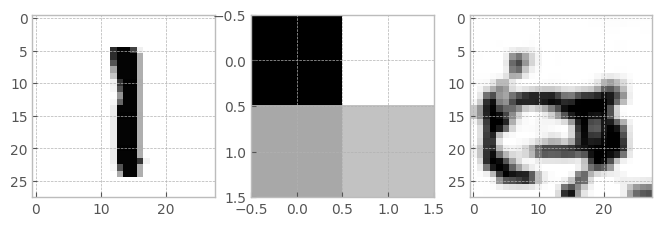

In [160]:
%matplotlib inline 

n = np.random.randint(0, len(ytest))
nbr, lbl = xtest[n], ytest[n]

r = np.random.normal(0,1,(1,2,2))
gen_img = nn_generator([r, tf.one_hot([lbl], depth=10)])

gen_sim, gen_lbls = nn_discriminator(gen_img)
real_sim, real_lbls = nn_discriminator(nbr.reshape((1, 28,28,1)))
nois_sim, nois_lbls = nn_discriminator(np.random.normal(0,1,(1,28,28)))

print(f"Real: {lbl} ", end='')
print(f"Similarity={real_sim}, lbl={np.argmax(real_lbls)}, p={np.max(real_lbls)}\n")
print("Generated: ", end='')
print(f"Similarity={gen_sim}, lbl={np.argmax(gen_lbls)}, p={np.max(gen_lbls)}\n")
print("Noise: ", end='')
print(f"Similarity={nois_sim}, lbl={np.argmax(nois_lbls)}, p={np.max(nois_lbls)}\n")

fig, ax = plt.subplots(1, 3, figsize=(8, 16), dpi=100)

print("MSE", np.sum(tf.keras.metrics.mean_squared_error(gen_img, nbr)))


ax[0].imshow(nbr, cmap='Greys')
ax[1].imshow(np.squeeze(r), cmap='Greys')
ax[2].imshow(np.array(gen_img).reshape((28,28)), cmap='Greys', vmin=0, vmax=1.)

### Discriminator performance check

In [161]:
np.sum(tf.keras.metrics.mean_squared_error(np.zeros(xtest.reshape(-1, 28*28).shape), xtest.reshape(-1, 28*28)))

1139.5810511655643

In [162]:
sim_test, lbl_test = nn_discriminator.predict(xtest)

313/313 [==============================] - 1s 4ms/step


In [163]:
N = xtest.shape[0]
lbl_test = np.argmax(lbl_test, axis=1)

print(f'Similarity: Min={sim_test.min()}, avg={np.mean(sim_test)}')
print("Accuracy =", round(100*np.sum(lbl_test==ytest) / N, 2))


Similarity: Min=0.9505621790885925, avg=0.9999924898147583
Accuracy = 99.26


In [164]:

n = np.random.randint(0, len(ytest), 64)
imgs_inp, lbl_inp = xtest[n], ytest[n]
#imgs_inp, lbl_inp = xtrain[n], ytrain[n]

noise_inp = np.random.normal(0,1, (64, 28,28))

sim_img, lbl_img = nn_discriminator(imgs_inp, training=False)
gene_img = nn_generator([np.random.normal(0., 1., (len(n), 2, 2)), tf.one_hot(np.random.randint(0, 10, len(n)), depth=10)])
sim_gene, lbl_gene = nn_discriminator(gene_img, training=False)
sim_nois, lbl_nois = nn_discriminator(noise_inp, training=False)



print("Dicr out on real=", np.mean(sim_img), "Dicr out on fake=", np.mean(sim_gene), "Dicr out on noise=", np.mean(sim_nois))

Dicr out on real= 1.0 Dicr out on fake= 1.811111e-09 Dicr out on noise= 0.031814437


#### Distribution of dis outputs on gen

In [165]:
import seaborn as sns

In [166]:
K = 10000
noise = np.random.normal(0, 1, (K, 2,2))

gen_out_test = nn_generator([noise, tf.one_hot(ytest, depth=10)])

In [167]:
dis_out_test_simG, dis_out_test_lblG = nn_discriminator.predict(gen_out_test)
dis_out_test_simR, dis_out_test_lblR = nn_discriminator.predict(xtest)

313/313 [==============================] - 1s 4ms/step


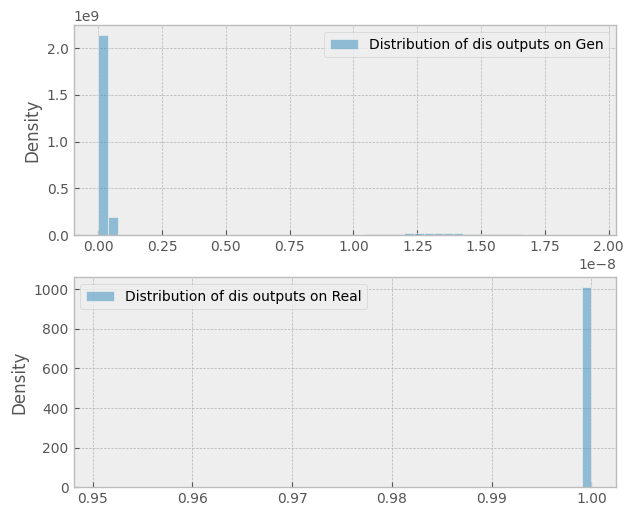

In [168]:
fig, axs = plt.subplots(2,1, figsize=(7,6), dpi=100)

sns.histplot(dis_out_test_simG, ax=axs[0], stat='density', bins=50, label='Distribution of dis outputs on Gen')
sns.histplot(dis_out_test_simR, ax=axs[1], stat='density', bins=50,  label='Distribution of dis outputs on Real')
for ax in axs: ax.legend()

##### By labels

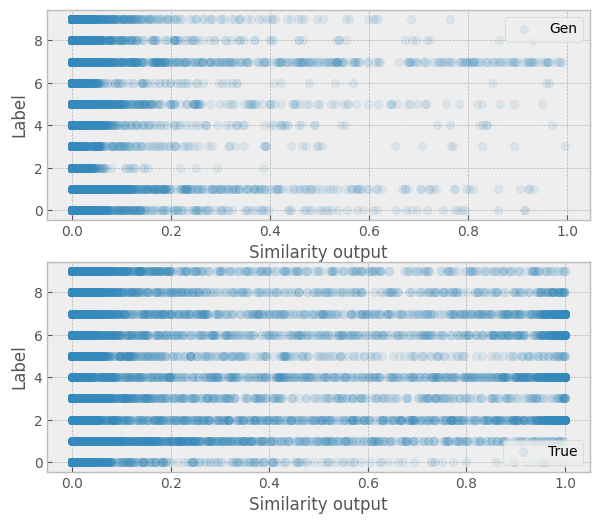

In [79]:
fig, axs = plt.subplots(2,1, figsize=(7,6), dpi=100)

axs[0].scatter(dis_out_test_simG, ytest, alpha=0.1, label='Gen')
axs[1].scatter(dis_out_test_simR, ytest, alpha=0.1, label='True')


for ax in axs: 
    ax.set_xlabel("Similarity output")
    ax.set_ylabel("Label")

    ax.legend()

##### Plot outs by similarity

In [80]:
vis.plot_images_rows_info()


__________________________________________________________
plot_images_rows(N, names, imsize, cmaps, *arrays)

function plots images of given 3D arrays. (N, a, b)
Nuber of arrays defines row size,
length of 1-dim - count of rows

INPUT:
    N - count of images to plot
    names - names of arrays data
    imsize - image resolution
    cmaps - list of cmaps (could be less or empty)
    *arrays: 3D arrays ro plot
    
EXAMPLE:
    plot_images_rows(1, [1,1,1], 100, [], np.random.sample((100,100)), 
                 np.random.sample((1000,1000)), 
                 np.random.sample((10,10)))



In [81]:
gen_thresh = 0.99
real_thresh = 0.01

x_th = xtest[np.squeeze(dis_out_test_simR) < real_thresh]
g_th = np.squeeze(gen_out_test[np.squeeze(dis_out_test_simR) > gen_thresh])

print(x_th.shape, g_th.shape)

# cut to min
n = np.min([x_th.shape[0], g_th.shape[0]])

x_th, g_th = x_th[0:n], g_th[0:n]

print(x_th.shape, g_th.shape)


(2858, 28, 28) (335, 28, 28)
(335, 28, 28) (335, 28, 28)


In [82]:
dis_out_test_simG.shape

(10000, 1)

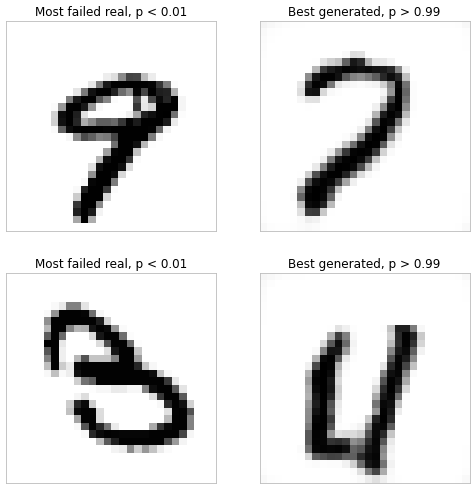

In [83]:
vis.plot_images_rows(2, 
                     [f'Most failed real, p < {real_thresh}', 
                            f'Best generated, p > {gen_thresh}'], 
                    60,
                    ['Greys'], x_th, g_th )